In [100]:
pwd

'/home/wsuser/work'

In [101]:
ls

Dataset/  forest1.h5  image-classification-model_new.tgz


In [102]:
!pip install opencv-python-headless

In [103]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [104]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='kbfH37nayCk6_GA8Xf0Eh9FEV9DYk3_rUFYGdX5BdOzi',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'trainimageclassification-donotdelete-pr-dxk9knctiefwpn'
object_key = 'Dataset.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

In [105]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [106]:
ls

Dataset/  forest1.h5  image-classification-model_new.tgz


In [107]:
pwd

'/home/wsuser/work'

In [108]:
train=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [109]:
train_dataset = train.flow_from_directory("/home/wsuser/work/Dataset/train_set",
                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 436 images belonging to 2 classes.


In [110]:
test_dataset = test.flow_from_directory("/home/wsuser/work/Dataset/test_set",
                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 121 images belonging to 2 classes.


In [111]:
test_dataset.class_indices

{'forest': 0, 'with fire': 1}

In [112]:
#to define linear initialisation import sequential
from keras.models import Sequential
#to add layer import Dense
from keras.layers import Dense
#to create convolution kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [113]:
model = keras.Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [114]:
model.add(Dense(150,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [115]:
model.compile(loss = 'binary_crossentropy',
              optimizer = "adam",
              metrics = ["accuracy"])

In [116]:
r = model.fit(train_dataset, epochs = 5, validation_data = test_dataset)

Epoch 1/5
14/14 [==============================] - 20s 1s/step - loss: 0.5355 - accuracy: 0.7362 - val_loss: 0.5298 - val_accuracy: 0.6942
Epoch 2/5
14/14 [==============================] - 18s 1s/step - loss: 0.4200 - accuracy: 0.8303 - val_loss: 0.2132 - val_accuracy: 0.9752
Epoch 3/5
14/14 [==============================] - 18s 1s/step - loss: 0.2550 - accuracy: 0.8922 - val_loss: 0.0612 - val_accuracy: 0.9835
Epoch 4/5
14/14 [==============================] - 18s 1s/step - loss: 0.1815 - accuracy: 0.9404 - val_loss: 0.0577 - val_accuracy: 0.9917
Epoch 5/5
14/14 [==============================] - 18s 1s/step - loss: 0.1703 - accuracy: 0.9243 - val_loss: 0.1604 - val_accuracy: 0.9421


In [118]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

In [119]:
predictions

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],

In [120]:
print(len(predictions))

121


In [121]:
model.save("forest1.h5")

In [122]:
!pip install opencv-python-headless

In [123]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np

In [124]:
model = load_model("forest1.h5")

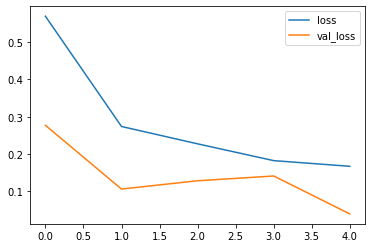

In [84]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

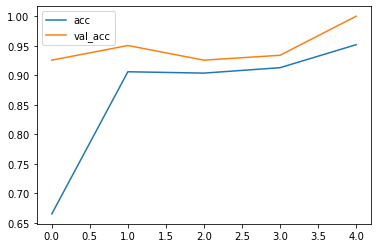

In [85]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [86]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(128,128))
  plt.imshow(img1)
  y=image.img_to_array(img1)
  x=np.expand_dims(y,axis=0)
  val=model.predict(x)
  print(val)
  if val==0:
    plt.xlabel(" NO fire",fontsize=30)
  elif val==1:
    plt.xlabel("fire",fontsize=30)

In [87]:
pwd

'/home/wsuser/work'

[[1.]]


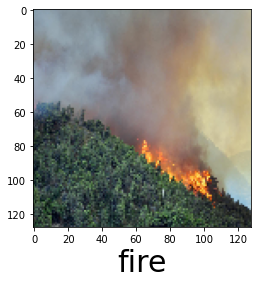

In [88]:
predictImage("/home/wsuser/work/Dataset/test_set/with fire/Forest_Fire (3).jpg")

[[0.]]


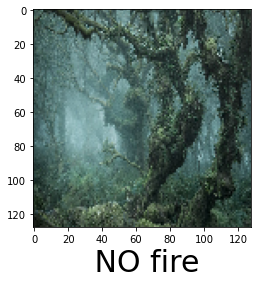

In [89]:
predictImage("/home/wsuser/work/Dataset/test_set/forest/01_NeilBurnell_Mystical_photoverticall.jpg")

In [90]:
pip install twilio

Note: you may need to restart the kernel to use updated packages.


In [91]:
pip install playsound

Note: you may need to restart the kernel to use updated packages.


In [92]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


In [93]:
#import opencv librariy
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#imort playsound package
from playsound import playsound

In [94]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='kbfH37nayCk6_GA8Xf0Eh9FEV9DYk3_rUFYGdX5BdOzi',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'trainimageclassification-donotdelete-pr-dxk9knctiefwpn'
object_key = 'forest fire.mp4'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [95]:
!tar -zcvf image-classification-model_new.tgz forest1.h5

forest1.h5


In [96]:
ls -1

Dataset/
forest1.h5
image-classification-model_new.tgz


In [97]:
!pip install watson-machine-learning-client --upgrade

In [132]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey" : "2RljZ4uCljl9bU-QLk99zE6tqRwg3opJ0uCE67w1OKL3"
}
client=APIClient(wml_credentials)

In [136]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources']if item['entity']['name']==space_name)['metadata']['id'])

In [137]:
space_uid=guid_from_space_name(client,'Train_Image_Classification')
print("space UID ="+space_uid)

space UID =ec433960-7e97-4de4-8cef-c418bbc231dd


In [138]:
client.set.default_space(space_uid)

'SUCCESS'

In [139]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [143]:
software_spec_uid=client.software_specifications.get_uid_by_name("tensorflow_1.15-py3.6")
software_spec_uid

'2b73a275-7cbf-420b-a912-eae7f436e0bc'

In [ ]:
model_details=client.repository.store_model(model='image-classification-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:"keras_2.2.4",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
}
                                           )
model_id=client.repository.get_model_uid(model_details)

In [ ]:
model_id

In [ ]:
client.repository.download(model_id,'my_model.tar.gz')